## Scopus Analyses

Written by A. R. Azari - 5/20/2020 for rudimentary analyses of the trends in ML literature over the course of the last decade across NASA divisions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in relevant data
names  = ['ML+Planetary', 'Planetary', 
          'ML+Earth', 'Earth', 
          'ML+Helio', 'Helio', 
          'ML+Astro', 'Astro']

searchTime = 'End2024Results'

frames = {}

for n in names:
    frames[n] = pd.read_csv('./Data/' + searchTime + '/' + n + '.csv', header = 2)
    frames[n].index = frames[n].Year.values.copy()
    frames[n] = frames[n].reindex(index = np.arange(int(1950), int(2025)))

In [3]:
#and make final normalized datasets by dividing over range 1950-2020

frames['ML+Planetary']['Total'] = frames['Planetary'].Papers
frames['ML+Earth']['Total']     = frames['Earth'].Papers
frames['ML+Helio']['Total']     = frames['Helio'].Papers
frames['ML+Astro']['Total']     = frames['Astro'].Papers

frames['ML+Planetary']['Percent']   = 100*(frames['ML+Planetary'].Papers / 
                                   frames['Planetary'].Papers) 

frames['ML+Earth']['Percent']   = 100*(frames['ML+Earth'].Papers / 
                                   frames['Earth'].Papers) 

frames['ML+Helio']['Percent']   = 100*(frames['ML+Helio'].Papers / 
                                   frames['Helio'].Papers) 

frames['ML+Astro']['Percent']   = 100*(frames['ML+Astro'].Papers / 
                                   frames['Astro'].Papers) 

#Assuming Poisson counting statistics + propagation of uncertainty 
#note this is the maximum uncertainty which assumes covariance = 0.

#this (cov. assumption) is a limiting assumption which if addressed 
#will only act to reduce uncertainty.

frames['ML+Planetary']['sigma']   = frames['ML+Planetary']['Percent'] * np.sqrt( 
                                                                                (np.sqrt(frames['ML+Planetary'].Papers) / frames['ML+Planetary'].Papers)**2.0  +  
                                                                                (np.sqrt(frames['Planetary'].Papers)    / frames['Planetary'].Papers)**2.0)

frames['ML+Earth']['sigma']   = frames['ML+Earth']['Percent'] * np.sqrt( 
                                                                                (np.sqrt(frames['ML+Earth'].Papers) / frames['ML+Earth'].Papers)**2.0  +  
                                                                                (np.sqrt(frames['Earth'].Papers)    / frames['Earth'].Papers)**2.0)


frames['ML+Helio']['sigma']   = frames['ML+Helio']['Percent'] * np.sqrt( 
                                                                                (np.sqrt(frames['ML+Helio'].Papers) / frames['ML+Helio'].Papers)**2.0  +  
                                                                                (np.sqrt(frames['Helio'].Papers)    / frames['Helio'].Papers)**2.0)


frames['ML+Astro']['sigma']   = frames['ML+Astro']['Percent'] * np.sqrt( 
                                                                                (np.sqrt(frames['ML+Astro'].Papers) / frames['ML+Astro'].Papers)**2.0  +  
                                                                                (np.sqrt(frames['Astro'].Papers)    / frames['Astro'].Papers)**2.0)




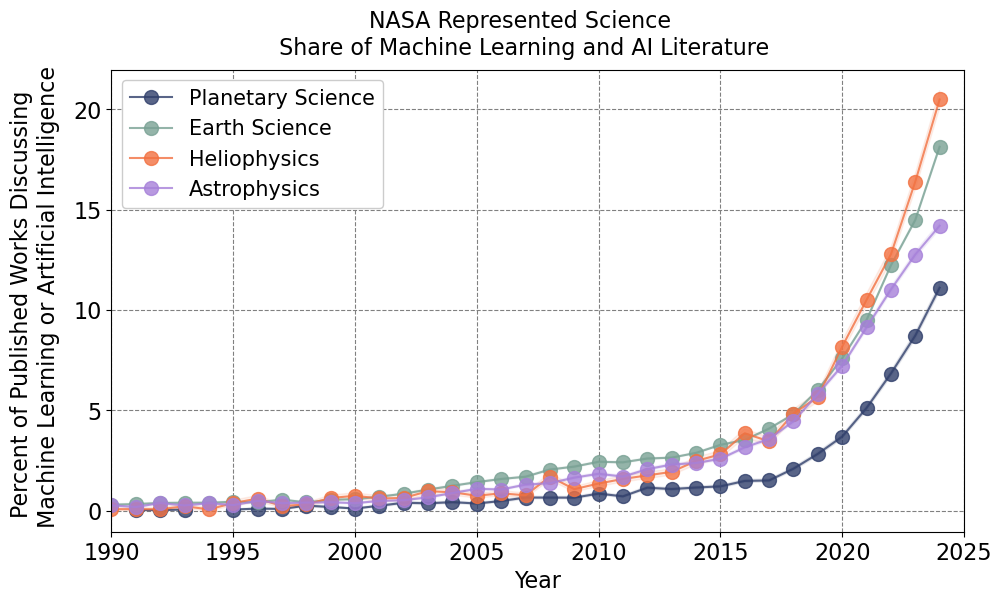

In [12]:
fig = plt.figure(figsize=(11, 6))

fig.suptitle('NASA Represented Science \n Share of Machine Learning and AI Literature \n', 
             fontsize=16)

#create grid spec and axis
gs = plt.GridSpec(1, 1)#, hspace=0.0, wspace=0.0, right = 1.0)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])


ax.fill_between(frames['ML+Planetary'].index, frames['ML+Planetary'].Percent - frames['ML+Planetary'].sigma, 
                frames['ML+Planetary'].Percent + frames['ML+Planetary'].sigma,
                color = '#303f6b', alpha = 0.1)

ax.fill_between(frames['ML+Earth'].index, frames['ML+Earth'].Percent - frames['ML+Earth'].sigma, 
                frames['ML+Earth'].Percent + frames['ML+Earth'].sigma,
                color = '#79a194', alpha = 0.1)

ax.fill_between(frames['ML+Helio'].index, frames['ML+Helio'].Percent - frames['ML+Helio'].sigma, 
                frames['ML+Helio'].Percent + frames['ML+Helio'].sigma,
                color = '#f27141', alpha = 0.1)

ax.fill_between(frames['ML+Astro'].index, frames['ML+Astro'].Percent - frames['ML+Astro'].sigma, 
                frames['ML+Astro'].Percent + frames['ML+Astro'].sigma,
                color = '#a680d9', alpha = 0.1)

ax.plot(frames['ML+Planetary'].index, frames['ML+Planetary'].Percent, '-o', 
        color = '#303f6b', markersize = 10, 
        label = 'Planetary Science', alpha = 0.8)

ax.plot(frames['ML+Earth'].index, frames['ML+Earth'].Percent, '-o', 
        color = '#79a194', markersize = 10, 
        label = 'Earth Science', alpha = 0.8)

ax.plot(frames['ML+Helio'].index, frames['ML+Helio'].Percent, '-o', 
        color = '#f27141', markersize = 10, 
        label = r'Heliophysics', alpha = 0.8)

ax.plot(frames['ML+Astro'].index, frames['ML+Astro'].Percent, '-o', 
        color = '#a680d9', markersize = 10, 
        label = r'Astrophysics', alpha = 0.8)


ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Percent of Published Works Discussing \n Machine Learning or Artificial Intelligence', 
              fontsize = 16, labelpad = 10)

ax.grid(color='gray', linestyle='dashed')
ax.tick_params(labelsize=16)

ax.set_xlim([1990, 2025])

ax.legend(fontsize = 15, framealpha = 1)

fig.savefig('./Figures/NASADivision_Share_ML_{}.png'.format(searchTime))
